# Analysis of the MNIST dataset using tensorflow

This is project is thought to familiarize myself with different deep learning modules, starting with tensorflows Keras API

In [1]:
import tensorflow as tf

## Load data

The keras api can directly load the data using the .dataset.mnist.load_data() command.

Keras datasets consist are formatted as tuples containing train and test data. Each split into X and y component.


In [2]:
mnist = tf.keras.datasets.mnist.load_data()
[len(i) for i in mnist]


[2, 2]

In [3]:
[X_train, y_train], [X_test, y_test] = mnist

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
print("Minimum value", X_train.min(),"Maximum value", X_train.max())

Minimum value 0 Maximum value 255


X_train contains 60,000 instances, each stored as a 28x28 array indicating the pixels of the image.

Each pixel has a number between 0 and 255, therefore we can normalize them by simply dividing by 255. 

(This is equivalent to min-max scaling: ${x}\prime = \frac{x-min(\bold{x})}{max(\bold{x})-min(\bold{x})}$)

This is plenty, so we can also use some of the instances as validation set. The data is shuffled, therefore the first 5,000 are chosen as validation without randomly selecting.

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_valid, X_train_new = X_train[:5000], X_train[5000:]
y_valid, y_train_new = y_train[:5000], y_train[5000:]

In [7]:
X_train_new.shape

(55000, 28, 28)

## Define the model

The Keras api is straight forward. For a first try a simple sequential model is produced to get a baseline for what accuracy we can expect. Hyperparameter tuning follows.

### Model structure

The intput is a 28x28, therefore a flatten layer is necessary.

Two hidden layers are initialized with 300 neurons each.

The output is defined with 10 neurons (numbers 0-9) with a softmax activation function, because we want a probability distribution as a result for classification.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling

Next, the model is compiled. This is done by adding the optimizer, loss function and metric to be returned.

Here stochastig gradient descent  is used with sparse_categorical_crossentropy as loss function. Cross entropy as loss is self explanatory as we are dealing with a multiclas clasification problem. Sparse is specified because there will be a lot of zeros in the matrix.

In [10]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Training

In [11]:
history = model.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 1.0122 - val_accuracy: 0.9118 - val_loss: 0.3113
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9116 - loss: 0.3072 - val_accuracy: 0.9318 - val_loss: 0.2441
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9298 - loss: 0.2485 - val_accuracy: 0.9406 - val_loss: 0.2073
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9396 - loss: 0.2096 - val_accuracy: 0.9500 - val_loss: 0.1878
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9478 - loss: 0.1839 - val_accuracy: 0.9558 - val_loss: 0.1612
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9541 - loss: 0.1568 - val_accuracy: 0.9606 - val_loss: 0.1466
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9600 - loss: 0.1413 - val_accuracy: 0.9648 - val_loss: 0.1348
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9637 - loss: 0.1288 - 

Amazingly, this simple model already returns a 99.31% accurate model!

We can plot the training curve to see, how exactly training affected the loss and accuracy of the model.

<Axes: >

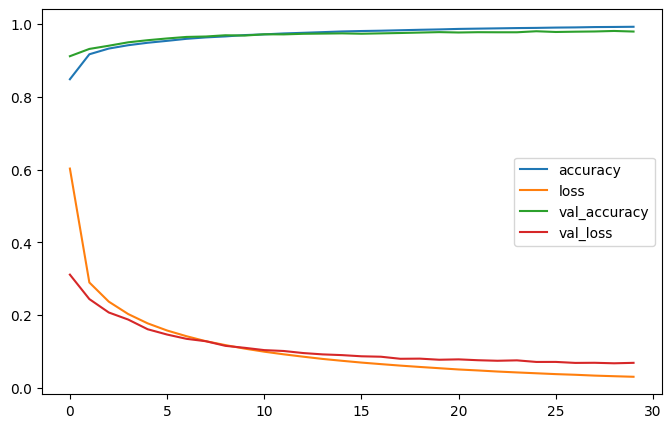

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

historyData = pd.DataFrame(history.history)
historyData.plot(figsize=(8, 5))

We see that the accuracy converges pretty well, but the model tends to overfit the training data. This is visible in the increasing discrapency between the training and validation loss.

To avoid this, thechniques like regularization, dropout, early stopping etc. can be implemented. But first the number of neurons per layer will be lowered and the learning rate adjusted.

### Hyperparameter tuning

In [34]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model2.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [35]:
history2 = model2.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.2718 - loss: 2.1463 - val_accuracy: 0.7094 - val_loss: 1.4847
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.7352 - loss: 1.2999 - val_accuracy: 0.8074 - val_loss: 0.8448
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8142 - loss: 0.7954 - val_accuracy: 0.8504 - val_loss: 0.6063
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8508 - loss: 0.5887 - val_accuracy: 0.8726 - val_loss: 0.4981
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.8673 - loss: 0.5009 - val_accuracy: 0.8864 - val_loss: 0.4370
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.8770 - loss: 0.4505 - val_accuracy: 0.8940 - val_loss: 0.3991
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.8843 - loss: 0.4136 - val_accuracy: 0.9002 - val_loss: 0.3720
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8917 -

<Axes: >

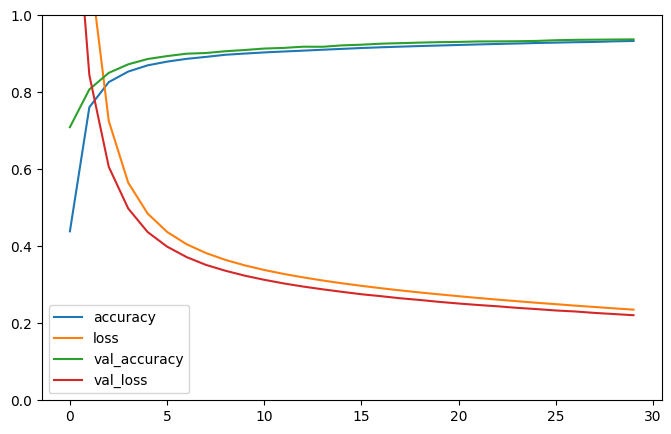

In [37]:
history2Data = pd.DataFrame(history2.history)
history2Data.plot(figsize=(8, 5),ylim=(0,1))

The model is now not overfitting anymore, but the overall accuracy is worse. Lets add some more epochs.

In [38]:
history2 = model2.fit(X_train_new, y_train_new, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9338 - loss: 0.2358 - val_accuracy: 0.9384 - val_loss: 0.2186
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9348 - loss: 0.2301 - val_accuracy: 0.9406 - val_loss: 0.2159
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9357 - loss: 0.2260 - val_accuracy: 0.9408 - val_loss: 0.2145
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9371 - loss: 0.2205 - val_accuracy: 0.9418 - val_loss: 0.2115
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9365 - loss: 0.2238 - val_accuracy: 0.9420 - val_loss: 0.2085
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9393 - loss: 0.2132 - val_accuracy: 0.9436 - val_loss: 0.2061
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9399 - loss: 0.2136 - val_accuracy: 0.9424 - val_loss: 0.2036
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.9396 -

<Axes: >

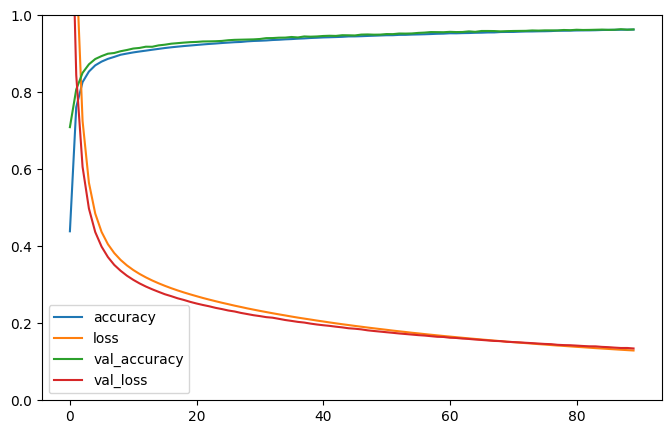

In [39]:
history2Data = pd.concat([history2Data,pd.DataFrame(history2.history)]).reset_index(drop=True)
history2Data.plot(figsize=(8, 5),ylim=(0,1))

We could keep training, but lets first try increasing the number of layers.

In [40]:
model3 = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"), 
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model3.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [41]:
history3 = model3.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.1534 - loss: 2.2903 - val_accuracy: 0.2870 - val_loss: 2.2397
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.3140 - loss: 2.1941 - val_accuracy: 0.4406 - val_loss: 1.9224
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.5339 - loss: 1.7029 - val_accuracy: 0.7258 - val_loss: 0.9404
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.7537 - loss: 0.8409 - val_accuracy: 0.8270 - val_loss: 0.5949
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8256 - loss: 0.5804 - val_accuracy: 0.8658 - val_loss: 0.4673
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8632 - loss: 0.4688 - val_accuracy: 0.8846 - val_loss: 0.4047
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.8813 - loss: 0.4079 - val_accuracy: 0.8996 - val_loss: 0.3548
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8913 -

<Axes: >

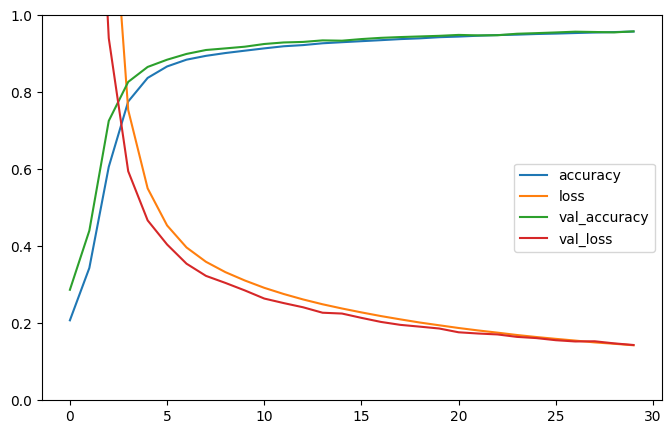

In [42]:
history3Data = pd.DataFrame(history3.history)
history3Data.plot(figsize=(8, 5),ylim=(0,1))

In [43]:
history3 = model3.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.9584 - loss: 0.1406 - val_accuracy: 0.9582 - val_loss: 0.1410
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9607 - loss: 0.1339 - val_accuracy: 0.9608 - val_loss: 0.1379
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.9615 - loss: 0.1320 - val_accuracy: 0.9590 - val_loss: 0.1375
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9607 - loss: 0.1321 - val_accuracy: 0.9610 - val_loss: 0.1342
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9636 - loss: 0.1257 - val_accuracy: 0.9618 - val_loss: 0.1358
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.9625 - loss: 0.1238 - val_accuracy: 0.9604 - val_loss: 0.1315
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.9650 - loss: 0.1178 - val_accuracy: 0.9640 - val_loss: 0.1278
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9656 -

<Axes: >

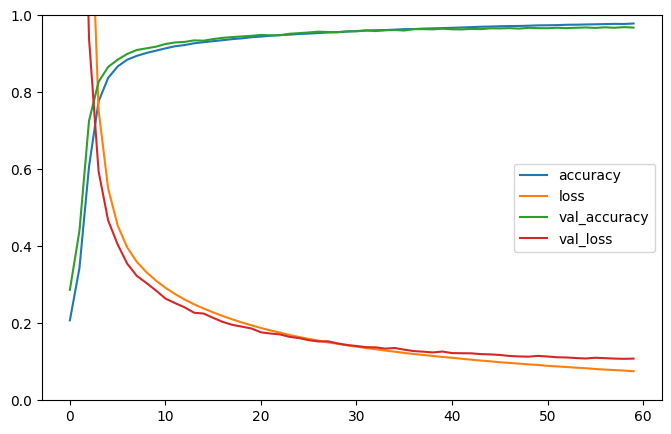

In [44]:
history3Data = pd.concat([history3Data,pd.DataFrame(history3.history)]).reset_index(drop=True)
history3Data.plot(figsize=(8, 5),ylim=(0,1))

The model shows high accuracy, but still overfits like before. Lets apply some regualrization in terms of dropouts.

In [46]:
model4 = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model4.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [47]:
history4 = model4.fit(X_train_new, y_train_new, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1001 - loss: 2.3891 - val_accuracy: 0.1046 - val_loss: 2.3015
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.1067 - loss: 2.3117 - val_accuracy: 0.1022 - val_loss: 2.3013
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.1159 - loss: 2.3043 - val_accuracy: 0.1090 - val_loss: 2.3012
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.1271 - loss: 2.2988 - val_accuracy: 0.1084 - val_loss: 2.3007
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.1441 - loss: 2.2904 - val_accuracy: 0.1122 - val_loss: 2.2970
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.1559 - loss: 2.2753 - val_accuracy: 0.1738 - val_loss: 2.2784
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.1777 - loss: 2.2414 - val_accuracy: 0.2228 - val_loss: 2.2353
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.1986 - 

<Axes: >

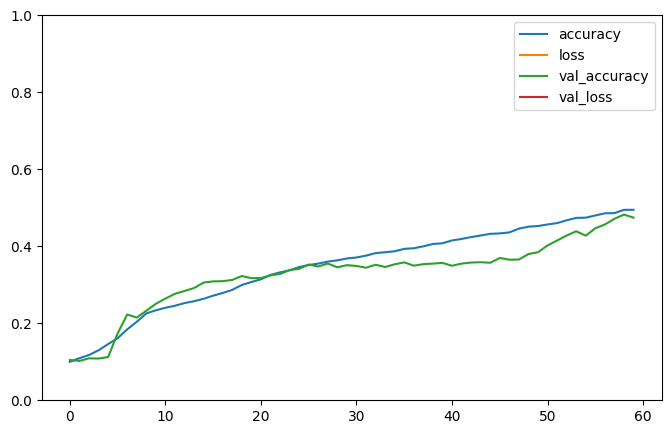

In [48]:
history4Data = pd.DataFrame(history4.history)
history4Data.plot(figsize=(8, 5),ylim=(0,1))

Convergening takes a lot longer. Let's add some more epoch. However, we want to avoid overfitting even more, so we can add some early stoppig. Furthermore, we define a leraning schedule to speed things up early.

In [76]:
learningSchedule = tf.keras.callbacks.ReduceLROnPlateau(
    mode="min",
    monitor="val_loss",
    factor=0.2,
    patience=10,
    min_lr=1e-05)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    mode="min",
    monitor="val_loss",
    patience=10)


model = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(100, activation="gelu"),
 tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train_new, y_train_new, epochs=180, validation_data=(X_valid, y_valid), batch_size=32, callbacks=[learningSchedule, earlyStopping])

Epoch 1/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6563 - loss: 0.9511 - val_accuracy: 0.9544 - val_loss: 0.1740 - learning_rate: 0.0010
Epoch 2/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9353 - loss: 0.2544 - val_accuracy: 0.9664 - val_loss: 0.1297 - learning_rate: 0.0010
Epoch 3/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9498 - loss: 0.2025 - val_accuracy: 0.9712 - val_loss: 0.1360 - learning_rate: 0.0010
Epoch 4/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9566 - loss: 0.1764 - val_accuracy: 0.9730 - val_loss: 0.1165 - learning_rate: 0.0010
Epoch 5/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9592 - loss: 0.1566 - val_accuracy: 0.9714 - val_loss: 0.1187 - learning_rate: 0.0010
Epoch 6/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1462 - val_accuracy: 0.9722 - val_loss: 0.1110 - learning_rate: 0.0010
Epoch 7/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9

<Axes: >

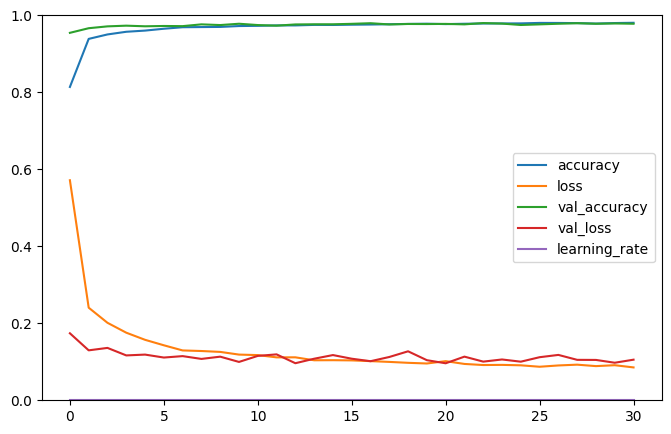

In [77]:
historyData = pd.DataFrame(history.history)
historyData.plot(figsize=(8, 5),ylim=(0,1))

In [78]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9735 - loss: 0.1438


[0.12410569936037064, 0.977400004863739]